## EDA PROYECTO CONEXION TOTAL

EDA ARCHIVO 1

1). Cargamos Archivo lo convertimos en dataframe N1 

In [1]:
import pandas as pd

df1 = pd.read_csv("Internet_BAF.csv")
df1.head(5)


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


2). Se mira tamaño de nuestro datafrme

In [2]:
import pandas as pd

# Tamaño del DataFrame
filas, columnas = df1.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)


Número de filas: 840
Número de columnas: 6


3). Verificar estructura y tipos de datos

In [3]:
# Verificar la estructura y los tipos de datos
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


Podemos analizar que hay 840 filas y 6 columnas la columa año y trimestre son de tipo entero y las restantes son tipo objeto, hay dos valores null en la columna Dial up y el dataframe tiene un espacio de memoria de 39.5 KB.

4).Observamos que columnas son numericas y cuales son categoricas es super imporantnte para nuestras metricas y analisis.

In [4]:
df1.head(5)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,2022,3,Catamarca,70.292,1,70.293
3,2022,3,Chaco,144.141,5,144.146
4,2022,3,Chubut,164.874,904,165.778


Podemos ver que solo la columna Provincia es Categorica las demas son numericas.

5). Cambiamos el tipo de dato en la columna  Banda Ancha  

In [5]:
import re

df1['Banda ancha fija'] = df1['Banda ancha fija'].apply(lambda x: int(re.sub('[^\d]', '', x)))


In [6]:
df1['Banda ancha fija'] = df1['Banda ancha fija'].astype(int)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    int32 
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int32(1), int64(2), object(3)
memory usage: 36.2+ KB


6). Evaluo Medidas de tendencia central y variabilidad de mi columna objetivo que es Banda Ancha fija

In [8]:
# Obtener estadísticas descriptivas de una columna
estadisticas = df1['Banda ancha fija'].describe()


In [9]:
estadisticas

count    8.400000e+02
mean     3.447674e+05
std      7.400503e+05
min      1.219300e+04
25%      5.192225e+04
50%      1.029360e+05
75%      1.778685e+05
max      4.715469e+06
Name: Banda ancha fija, dtype: float64

7).Verifico si hay provincias repetidas y hago el conteo de cuantas provincias hay en mi dataframe

In [10]:
# Verificar si hay provincias repetidas
provincias_repetidas = df1['Provincia'].duplicated()
df_repetidas = df1[provincias_repetidas]
print("Provincias repetidas:\n", df_repetidas)

# Contar el número de provincias distintas
num_provincias = df1['Provincia'].nunique()
print("Número de provincias distintas:", num_provincias)


Provincias repetidas:
       Año  Trimestre            Provincia  Banda ancha fija Dial up      Total
24   2022          2         Buenos Aires           4660984   6.199  4.667.183
25   2022          2      Capital Federal           1534626   2.145  1.536.771
26   2022          2            Catamarca             67007       1     67.008
27   2022          2                Chaco            143559       5    143.564
28   2022          2               Chubut            161901     904    162.805
..    ...        ...                  ...               ...     ...        ...
835  2014          1           Santa Cruz             26304     460     26.764
836  2014          1             Santa Fe            506000     612    506.612
837  2014          1  Santiago Del Estero             37124       9     37.133
838  2014          1     Tierra Del Fuego             27272     766     28.038
839  2014          1              Tucumán            129944      88    130.032

[816 rows x 6 columns]
Númer

In [70]:
provincias_diferentes = df1['Provincia'].unique()
print("Provincias diferentes:", provincias_diferentes)


Provincias diferentes: ['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


8).Evaluo si hya informacio n de los 4 trimestres del año

In [12]:
num_trimestres = df1['Trimestre'].nunique()
print("Número de trimestres diferentes:", num_trimestres)


Número de trimestres diferentes: 4


9).Agrupo las columnas objetivo para mi analisis las cuales son provincias año y Bnada ancha fija

In [71]:
import pandas as pd

# Agrupar por provincia y año, y seleccionar el dato del primer trimestre (1)
df1_agrupado = df1.groupby(['Provincia', 'Año'])['Banda ancha fija'].first().reset_index()

# Imprimir el resultado
df1_agrupado


,Provincia,Año,Banda ancha fija
0,Buenos Aires,2014,2801178
1,Buenos Aires,2015,2946743
2,Buenos Aires,2016,3131499
3,Buenos Aires,2017,3171206
4,Buenos Aires,2018,3626502
...,...,...,...
211,Tucumán,2018,171972
212,Tucumán,2019,198621
213,Tucumán,2020,231067
214,Tucumán,2021,238609


Graficos

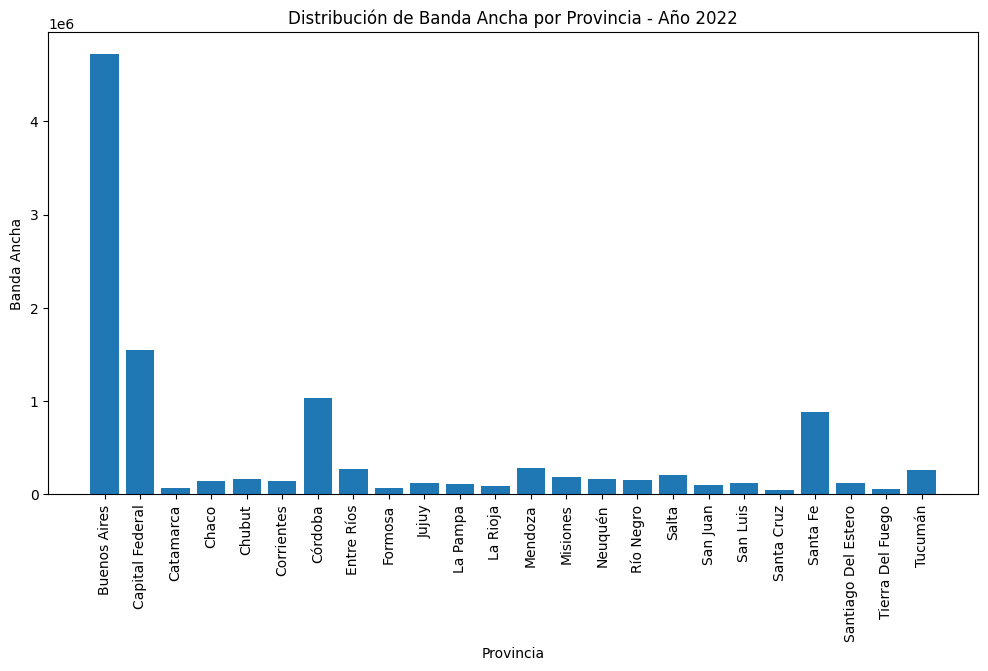

In [14]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para el año 2022
df_2022 = df1_agrupado[df1_agrupado['Año'] == 2022]

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_2022['Provincia'], df_2022['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Banda Ancha por Provincia - Año 2022')
plt.xlabel('Provincia')
plt.ylabel('Banda Ancha')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


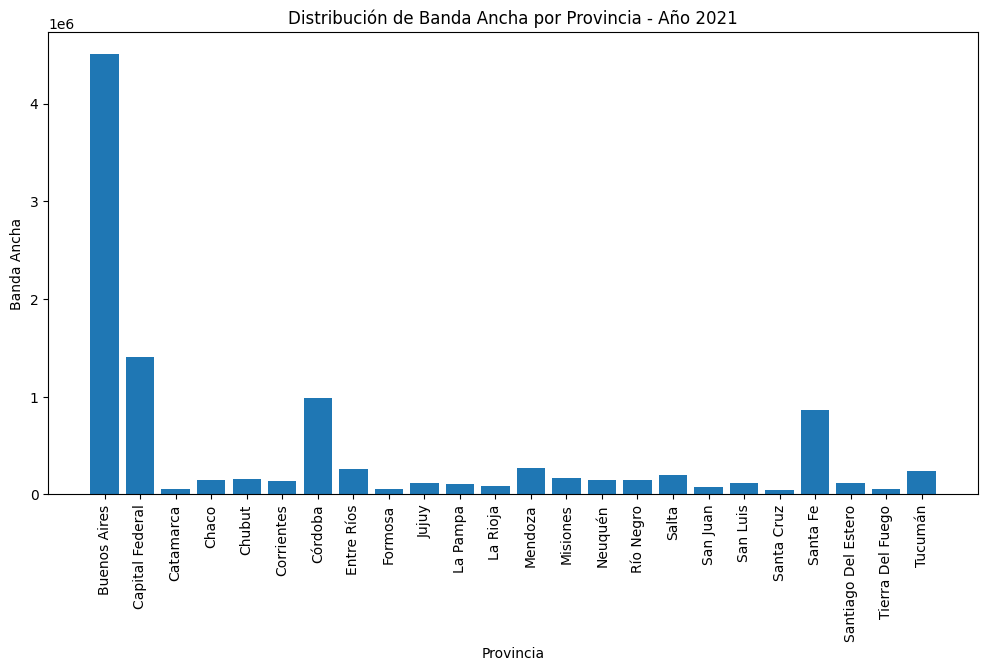

In [15]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para el año 2021
df_2021 = df1_agrupado[df1_agrupado['Año'] == 2021]

# Configurar el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_2021['Provincia'], df_2021['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Distribución de Banda Ancha por Provincia - Año 2021')
plt.xlabel('Provincia')
plt.ylabel('Banda Ancha')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


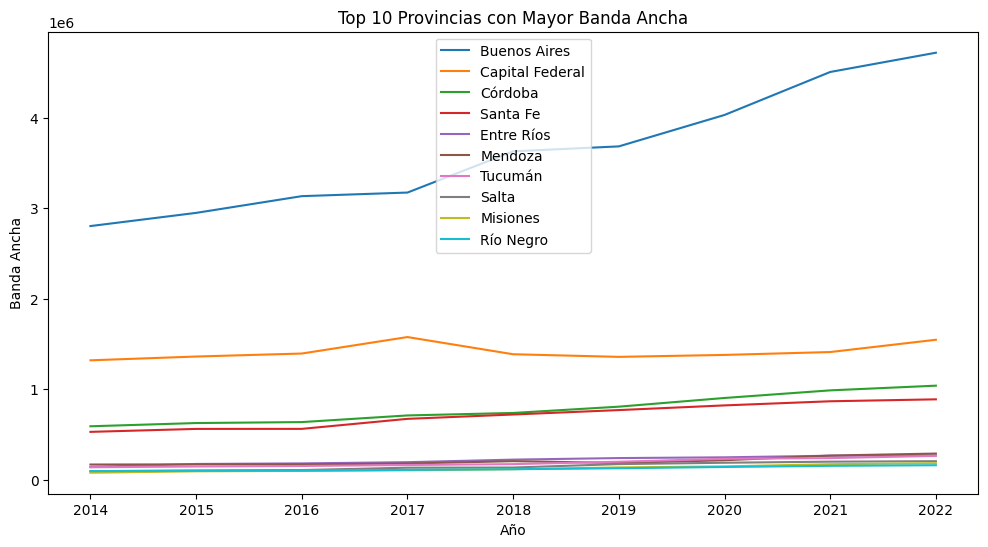

In [16]:
import matplotlib.pyplot as plt

# Calcular la suma de banda ancha para cada provincia en todos los años
df_provincias = df1_agrupado.groupby('Provincia')['Banda ancha fija'].sum()

# Ordenar las provincias de mayor a menor según la suma de banda ancha
top_10_provincias = df_provincias.sort_values(ascending=False).head(10)

# Filtrar el DataFrame original para incluir solo las provincias seleccionadas
df_top_10 = df1_agrupado[df1_agrupado['Provincia'].isin(top_10_provincias.index)]

# Crear el gráfico de líneas para la evolución de la banda ancha de las 10 provincias
plt.figure(figsize=(12, 6))
for provincia in top_10_provincias.index:
    data_provincia = df_top_10[df_top_10['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Banda ancha fija'], label=provincia)

# Configurar el título y etiquetas de los ejes
plt.title('Top 10 Provincias con Mayor Banda Ancha')
plt.xlabel('Año')
plt.ylabel('Banda Ancha')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


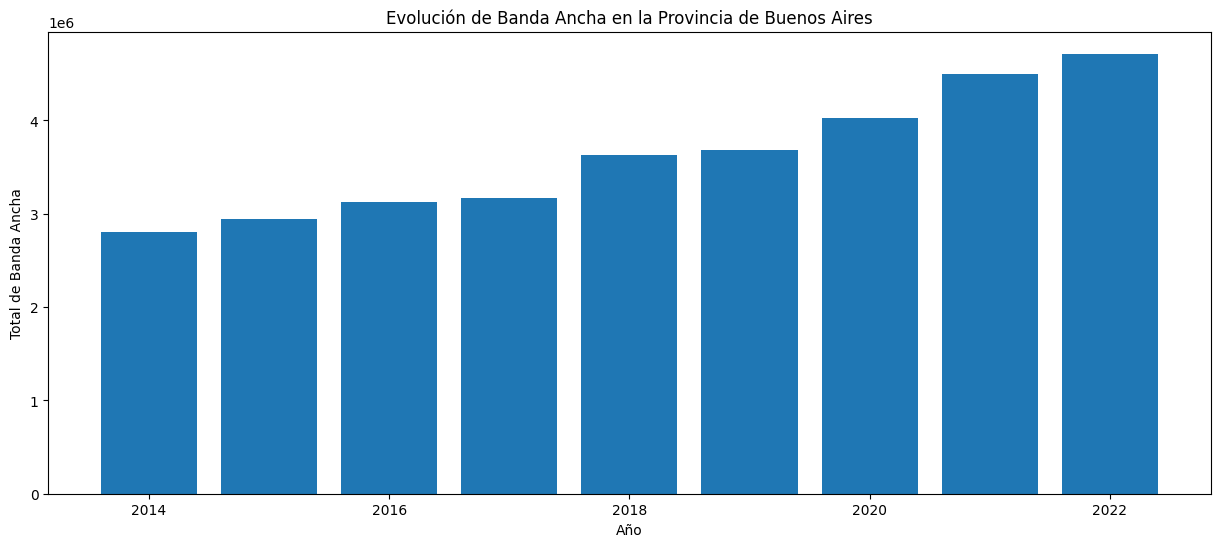

In [19]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por provincia de Buenos Aires
df_buenosaires = df1_agrupado[df1_agrupado['Provincia'] == 'Buenos Aires']

# Configurar el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(df_buenosaires['Año'], df_buenosaires['Banda ancha fija'])
plt.xlabel('Año')
plt.ylabel('Total de Banda Ancha')
plt.title('Evolución de Banda Ancha en la Provincia de Buenos Aires')

# Mostrar el gráfico de barras
plt.show()




In [20]:
import pandas as pd

# Calcular el porcentaje de banda ancha para cada provincia en todos los años
df1_agrupado['Porcentaje'] = (df1_agrupado.groupby('Provincia')['Banda ancha fija'].transform('sum') / df1_agrupado['Banda ancha fija'].sum()) * 100

# Redondear los porcentajes a un solo decimal
df1_agrupado['Porcentaje'] = df1_agrupado['Porcentaje'].round(1)

# Seleccionar las columnas 'Provincia' y 'Porcentaje' y eliminar las filas duplicadas
df_provincias = df1_agrupado[['Provincia', 'Porcentaje']].drop_duplicates()

# Ordenar el DataFrame por los valores de porcentaje de forma descendente
df_provincias_sorted = df_provincias.sort_values('Porcentaje', ascending=False)

# Mostrar la tabla de provincias y porcentajes con un solo decimal
print(df_provincias_sorted)


               Provincia  Porcentaje
0           Buenos Aires        42.4
9        Capital Federal        16.5
54               Córdoba         9.1
180             Santa Fe         8.3
63            Entre Ríos         2.5
108              Mendoza         2.4
207              Tucumán         2.2
144                Salta         1.7
117             Misiones         1.5
126              Neuquén         1.4
135            Río Negro         1.4
27                 Chaco         1.3
36                Chubut         1.2
45            Corrientes         1.2
90              La Pampa         1.0
81                 Jujuy         0.9
189  Santiago Del Estero         0.9
153             San Juan         0.8
162             San Luis         0.8
99              La Rioja         0.6
72               Formosa         0.5
18             Catamarca         0.5
198     Tierra Del Fuego         0.5
171           Santa Cruz         0.4


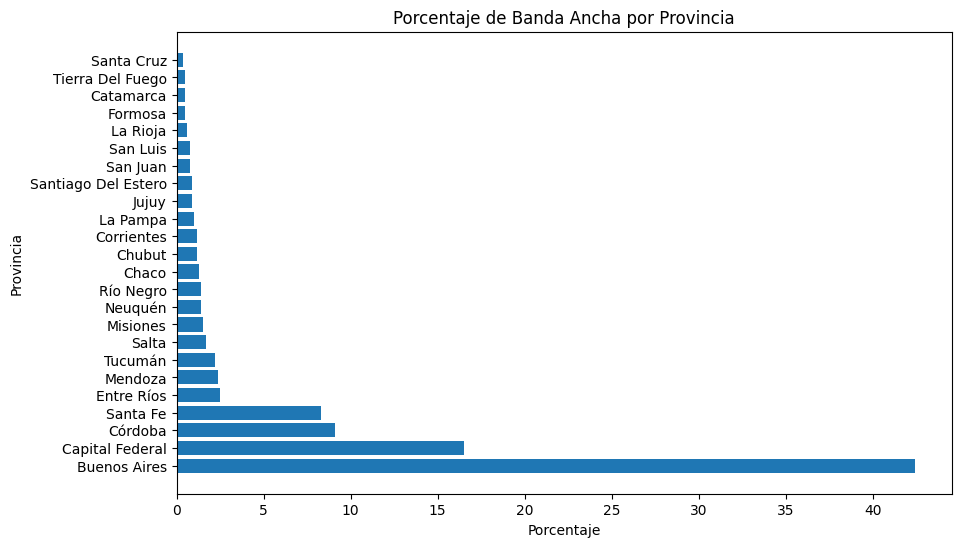

In [21]:
import matplotlib.pyplot as plt

# Obtener los datos de provincias y porcentajes
provincias = df_provincias_sorted['Provincia']
porcentajes = df_provincias_sorted['Porcentaje']

# Configurar el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(provincias, porcentajes)

# Configurar el título y etiquetas de los ejes
plt.title('Porcentaje de Banda Ancha por Provincia')
plt.xlabel('Porcentaje')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.show()


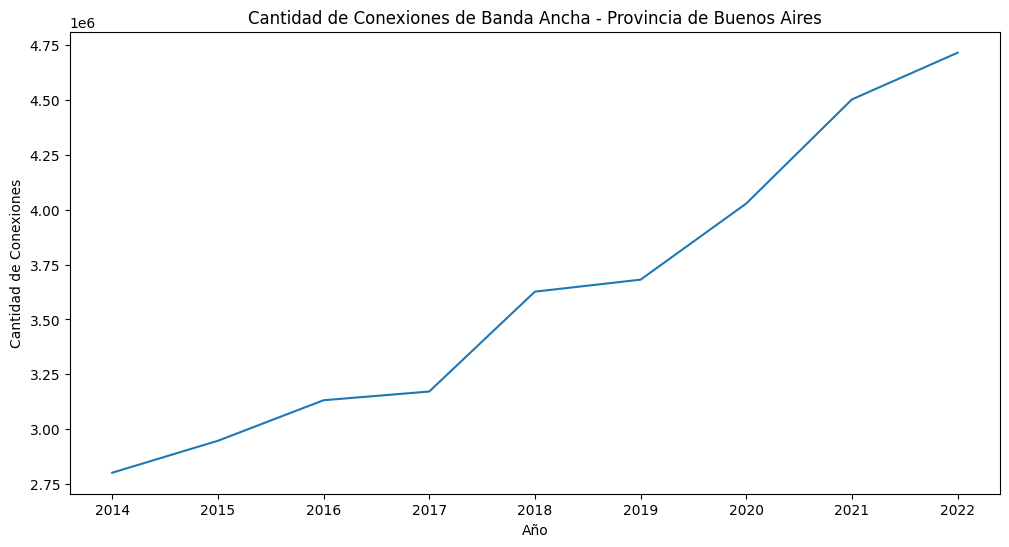

In [22]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Buenos Aires
df_buenosaires = df1_agrupado[df1_agrupado['Provincia'] == 'Buenos Aires']

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_buenosaires['Año'], df_buenosaires['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Conexiones de Banda Ancha - Provincia de Buenos Aires')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar el gráfico
plt.show()


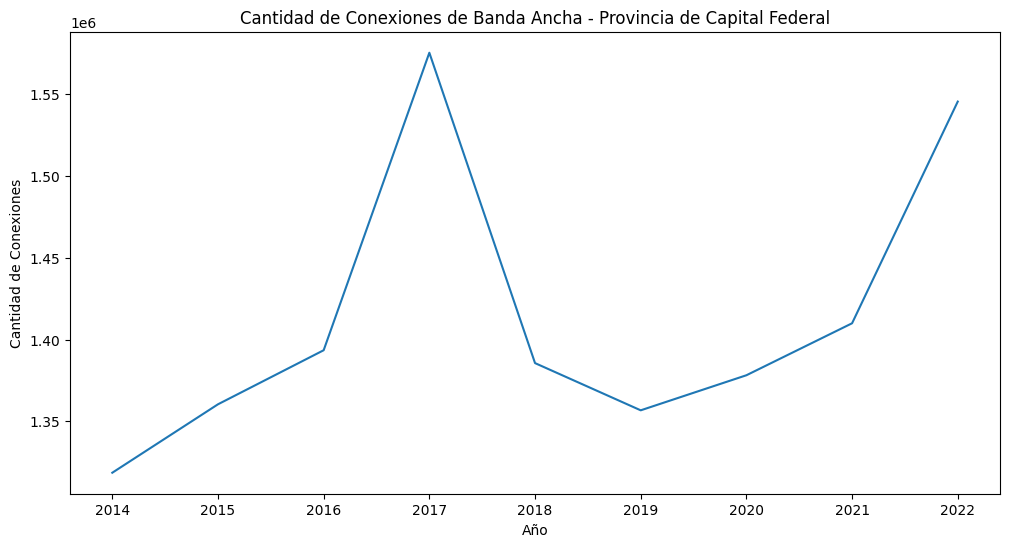

In [23]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Capital Federal
df_capital = df1_agrupado[df1_agrupado['Provincia'] == 'Capital Federal']

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_capital['Año'], df_capital['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Conexiones de Banda Ancha - Provincia de Capital Federal')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar el gráfico
plt.show()


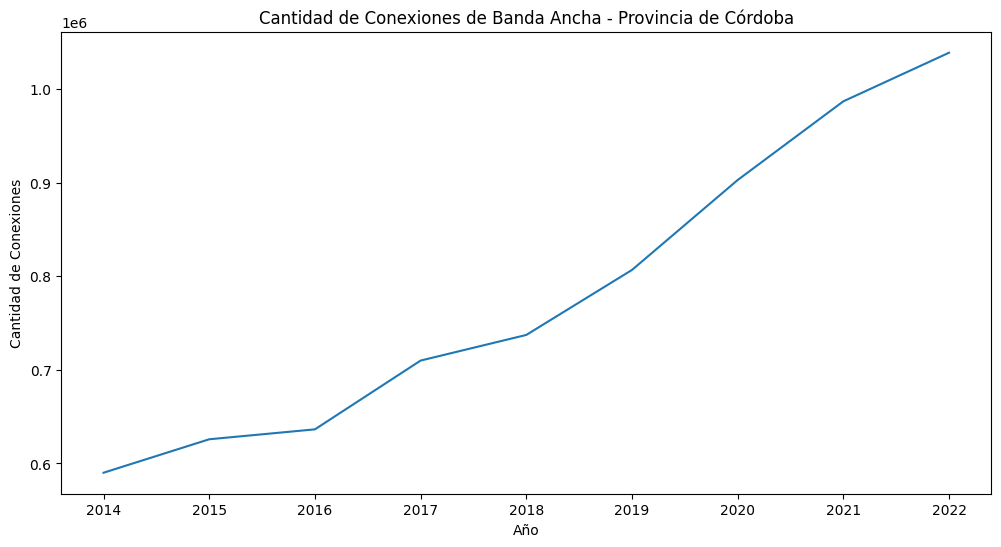

In [24]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Córdoba
df_cordoba = df1_agrupado[df1_agrupado['Provincia'] == 'Córdoba']

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_cordoba['Año'], df_cordoba['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Conexiones de Banda Ancha - Provincia de Córdoba')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar el gráfico
plt.show()


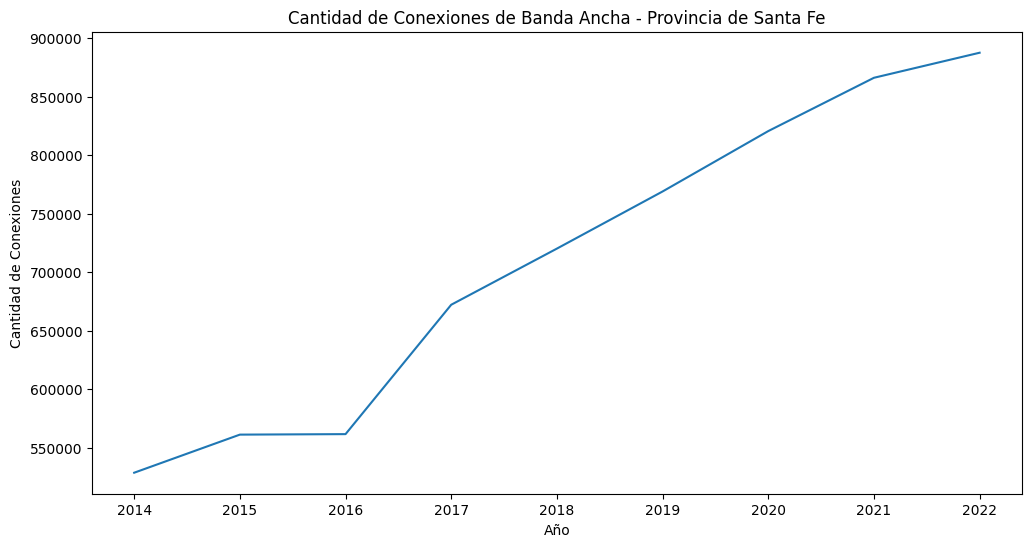

In [25]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Santa Fe
df_santafe = df1_agrupado[df1_agrupado['Provincia'] == 'Santa Fe']

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_santafe['Año'], df_santafe['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Conexiones de Banda Ancha - Provincia de Santa Fe')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar el gráfico
plt.show()


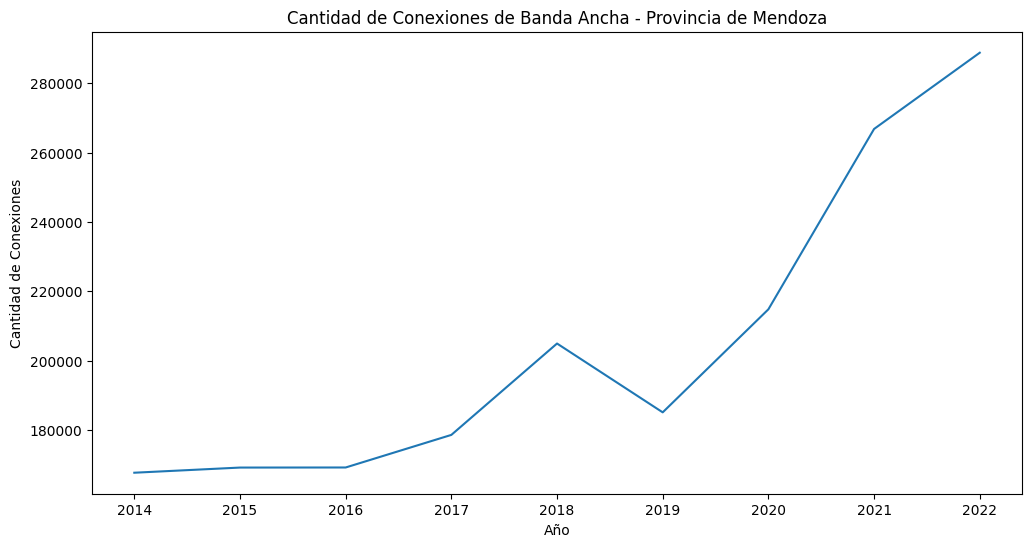

In [26]:
import matplotlib.pyplot as plt

# Filtrar los datos solo para la provincia de Mendoza
df_mendoza = df1_agrupado[df1_agrupado['Provincia'] == 'Mendoza']

# Configurar el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(df_mendoza['Año'], df_mendoza['Banda ancha fija'])

# Configurar el título y etiquetas de los ejes
plt.title('Cantidad de Conexiones de Banda Ancha - Provincia de Mendoza')
plt.xlabel('Año')
plt.ylabel('Cantidad de Conexiones')

# Mostrar el gráfico
plt.show()


10). Descargo mi un archivo complementario del Censo Nacional de Población, Hogares y Viviendas 2022 el cula me permirte ver pobalcion y total de viviendas por Provincia.

In [72]:
import pandas as pd

# Importar archivo CSV
df_provincias = pd.read_csv('Poblacion_Provincias.csv', sep=';', encoding='latin-1')


# Ver DataFrame
df_provincias


,Provincia,Total Poblacion,Total de viviendas particulares,Total de Viviendas Colectivas,Total Viviendas
0,Capital Federal,3.120.612,1.638.764,1.946,1.640.710
1,Buenos Aires,17.569.053,6.695.273,6.535,6.701.808
2,Catamarca,429.556,158.989,449.000,159.438
3,Chaco,1.142.963,401.658,443.000,402.101
4,Chubut,603.120,236.010,1.123,237.133
5,Córdoba,3.978.984,1.630.356,3.548,1.633.904
6,Corrientes,1.197.553,406.480,555.000,407.035
7,Entre Ríos,1.426.426,559.398,1.159,560.557
8,Formosa,606.041,212.941,232.000,213.173
9,Jujuy,797.955,276.222,326.000,276.548


11.) Observamos tipo de datos

In [73]:
df_provincias.dtypes

Provincia                           object
Total  Poblacion                    object
Total de viviendas particulares     object
Total de Viviendas Colectivas      float64
Total Viviendas                     object
dtype: object

In [74]:
df_provincias

,Provincia,Total Poblacion,Total de viviendas particulares,Total de Viviendas Colectivas,Total Viviendas
0,Capital Federal,3.120.612,1.638.764,1.946,1.640.710
1,Buenos Aires,17.569.053,6.695.273,6.535,6.701.808
2,Catamarca,429.556,158.989,449.000,159.438
3,Chaco,1.142.963,401.658,443.000,402.101
4,Chubut,603.120,236.010,1.123,237.133
5,Córdoba,3.978.984,1.630.356,3.548,1.633.904
6,Corrientes,1.197.553,406.480,555.000,407.035
7,Entre Ríos,1.426.426,559.398,1.159,560.557
8,Formosa,606.041,212.941,232.000,213.173
9,Jujuy,797.955,276.222,326.000,276.548


In [30]:
df_2022

,Provincia,Año,Banda ancha fija
8,Buenos Aires,2022,4715469
17,Capital Federal,2022,1545534
26,Catamarca,2022,70292
35,Chaco,2022,144141
44,Chubut,2022,164874
53,Corrientes,2022,144842
62,Córdoba,2022,1038600
71,Entre Ríos,2022,268937
80,Formosa,2022,68537
89,Jujuy,2022,118823


12.) Hacemos union de los dos datafarme para un mejor analisis y para sacar algunos promedios

In [76]:
df_merged = pd.merge(df_provincias, df_2022, on='Provincia')


In [77]:
df_merged

,Provincia,Total Poblacion,Total de viviendas particulares,Total de Viviendas Colectivas,Total Viviendas,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
0,Capital Federal,3.120.612,1.638.764,1.946,1.640.710,2022,6,1561.000,17.297,217.653,168.371,103.552,212.801,110325.0,3670431.0,4501991.0
1,Buenos Aires,17.569.053,6.695.273,6.535,6.701.808,2022,6,92.215,86.088,927.225,831.125,415.242,157.950,898935.0,10535495.0,13944275.0
2,Catamarca,429.556,158.989,449.000,159.438,2022,6,213.000,1253.000,18.553,21.037,10.891,6.622,11171.0,129939.0,199679.0
3,Chaco,1.142.963,401.658,443.000,402.101,2022,6,1383.000,989.146,60.282,37.338,44.814,14.999,51273.0,218607.0,431829.0
4,Chubut,603.120,236.010,1.123,237.133,2022,6,331.000,4.565,94.013,102.052,43.706,55.652,152880.0,47012.0,500211.0
5,Córdoba,3.978.984,1.630.356,3.548,1.633.904,2022,6,298.000,36.065,358.109,216.879,90.649,40.403,479732.0,1846771.0,3068906.0
6,Corrientes,1.197.553,406.480,555.000,407.035,2022,6,201.000,11.831,74.455,42.854,53.877,21.308,72243.0,155652.0,432421.0
7,Entre Ríos,1.426.426,559.398,1.159,560.557,2022,6,321.000,16.950,145.032,79.069,85.954,50.268,145922.0,282721.0,806237.0
8,Formosa,606.041,212.941,232.000,213.173,2022,6,291.000,1162.000,46.196,19.137,1871.000,1767.000,71485.0,49058.0,190967.0
9,Jujuy,797.955,276.222,326.000,276.548,2022,6,174.000,5.469,47.365,111.792,1644.000,4.895,60734.0,118573.0,350646.0


In [78]:
df_merged

,Provincia,Total Poblacion,Total de viviendas particulares,Total de Viviendas Colectivas,Total Viviendas,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
0,Capital Federal,3.120.612,1.638.764,1.946,1.640.710,2022,6,1561.000,17.297,217.653,168.371,103.552,212.801,110325.0,3670431.0,4501991.0
1,Buenos Aires,17.569.053,6.695.273,6.535,6.701.808,2022,6,92.215,86.088,927.225,831.125,415.242,157.950,898935.0,10535495.0,13944275.0
2,Catamarca,429.556,158.989,449.000,159.438,2022,6,213.000,1253.000,18.553,21.037,10.891,6.622,11171.0,129939.0,199679.0
3,Chaco,1.142.963,401.658,443.000,402.101,2022,6,1383.000,989.146,60.282,37.338,44.814,14.999,51273.0,218607.0,431829.0
4,Chubut,603.120,236.010,1.123,237.133,2022,6,331.000,4.565,94.013,102.052,43.706,55.652,152880.0,47012.0,500211.0
5,Córdoba,3.978.984,1.630.356,3.548,1.633.904,2022,6,298.000,36.065,358.109,216.879,90.649,40.403,479732.0,1846771.0,3068906.0
6,Corrientes,1.197.553,406.480,555.000,407.035,2022,6,201.000,11.831,74.455,42.854,53.877,21.308,72243.0,155652.0,432421.0
7,Entre Ríos,1.426.426,559.398,1.159,560.557,2022,6,321.000,16.950,145.032,79.069,85.954,50.268,145922.0,282721.0,806237.0
8,Formosa,606.041,212.941,232.000,213.173,2022,6,291.000,1162.000,46.196,19.137,1871.000,1767.000,71485.0,49058.0,190967.0
9,Jujuy,797.955,276.222,326.000,276.548,2022,6,174.000,5.469,47.365,111.792,1644.000,4.895,60734.0,118573.0,350646.0


13.) Creo mi dataframe con los datos y columnas que necesito para mi analisis y crear mi primer kpi

In [79]:
import pandas as pd

data = {'Provincia': ['Capital Federal', 'Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
        'Total Poblacion': [3120612, 17569053, 429556, 1142963, 603120, 3978984, 1197553, 1426426, 606041, 797955, 366022, 384607, 2014533, 1280960, 726590, 762067, 1440672, 818234, 540905, 333473, 3556522, 1054028, 190641, 1703186],
        'Total Viviendas': [1640710, 6701808, 159438, 402101, 237133, 1633904, 407035, 560557, 213173, 276548, 164242, 150182, 710098, 467502, 274077, 296412, 479199, 265434,201610 ,131881 ,1460580 ,349058 ,67228 ,555801],
        'Banda ancha fija': [1545534 ,4715469 ,70292 ,144141 ,164874 ,1038600 ,144842 ,268937 ,68537 ,118823 ,115921 ,86860 ,288746 ,182157 ,162693 ,160010 ,204536 ,103118 ,121888 ,49312 ,887700 ,119030 ,53584 ,263087]}

df_merged = pd.DataFrame(data)

df_merged['Promedio'] = df_merged['Banda ancha fija'] / df_merged['Total Viviendas']

df_merged


,Provincia,Total Poblacion,Total Viviendas,Banda ancha fija,Promedio
0,Capital Federal,3120612,1640710,1545534,0.941991
1,Buenos Aires,17569053,6701808,4715469,0.703611
2,Catamarca,429556,159438,70292,0.440874
3,Chaco,1142963,402101,144141,0.358470
4,Chubut,603120,237133,164874,0.695281
5,Córdoba,3978984,1633904,1038600,0.635655
6,Corrientes,1197553,407035,144842,0.355847
7,Entre Ríos,1426426,560557,268937,0.479767
8,Formosa,606041,213173,68537,0.321509
9,Jujuy,797955,276548,118823,0.429665


Graficos

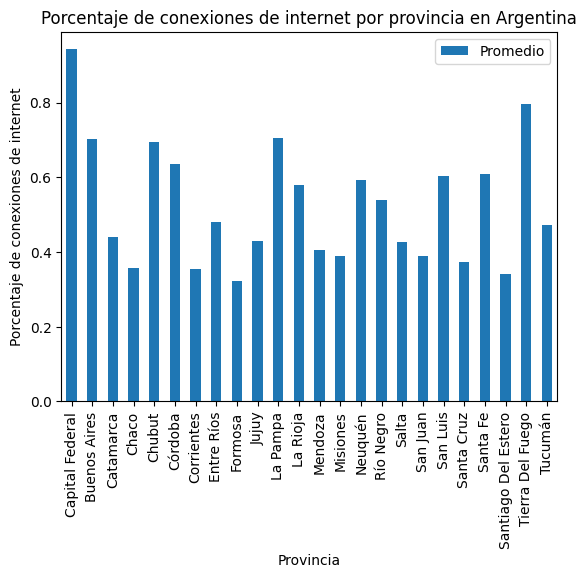

In [82]:
ax = df_merged.plot.bar(x='Provincia', y='Promedio', rot=90)
ax.set_xlabel('Provincia')
ax.set_ylabel('Porcentaje de conexiones de internet')
ax.set_title('Porcentaje de conexiones de internet por provincia en Argentina')
plt.show()


In [81]:
table = df_merged[['Provincia', 'Promedio']]
table['Promedio'] = table['Promedio'].apply(lambda x: f'{x:.2f}%')
table = table.rename(columns={'Provincia': 'Provincia', 'Promedio': 'Porcentaje'})
print(table)


              Provincia Porcentaje
0       Capital Federal      0.94%
1          Buenos Aires      0.70%
2             Catamarca      0.44%
3                 Chaco      0.36%
4                Chubut      0.70%
5               Córdoba      0.64%
6            Corrientes      0.36%
7            Entre Ríos      0.48%
8               Formosa      0.32%
9                 Jujuy      0.43%
10             La Pampa      0.71%
11             La Rioja      0.58%
12              Mendoza      0.41%
13             Misiones      0.39%
14              Neuquén      0.59%
15            Río Negro      0.54%
16                Salta      0.43%
17             San Juan      0.39%
18             San Luis      0.60%
19           Santa Cruz      0.37%
20             Santa Fe      0.61%
21  Santiago Del Estero      0.34%
22     Tierra Del Fuego      0.80%
23              Tucumán      0.47%


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_8568\685024843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Promedio'] = table['Promedio'].apply(lambda x: f'{x:.2f}%')


EDA ARCHIVO 2

1). Cargamos Archivo lo convertimos en dataframe N2

In [107]:
import pandas as pd

df2 = pd.read_csv("Internet_Accesos-por-velocidad.csv")

df2.head(5)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


Observamos Tamaño del dataframe

In [108]:
import pandas as pd

# Tamaño del DataFrame
filas, columnas = df2.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)


Número de filas: 840
Número de columnas: 12


3). Verificar estructura y los tipos de datos

In [109]:
# Verificar la estructura y los tipos de datos
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


Podemos analizar que hay 840 filas y 12  Todas las columas son de tipo float excepto la columa Total y la columna + 1 Mbps-10Mbps hay 6 valores null en  la columna OTROS  y el dataframe tiene un espacio de memoria de 78.9 KB

4).Observamos que columnas son numericas y cuales son categoricas es super importante para nuestras metricas y analisis.

In [110]:
df2.head(5)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


Podemos ver que solo la columna Provincia es Categorica las demas son numericas.

5). Cambiamos el tipo de dato en la columna  + 1 Mbps - 6 Mbps  y la columna Total

In [111]:
df2['+ 1 Mbps - 6 Mbps cleaned'] = df2['+ 1 Mbps - 6 Mbps'].astype(str).str.replace(r'\.', '', regex=True)
df2['+ 30 Mbps cleaned'] = df2['+ 30 Mbps'].astype(str).str.replace(r'\.', '', regex=True)

df2['+ 1 Mbps - 6 Mbps cleaned'] = df2['+ 1 Mbps - 6 Mbps cleaned'].astype(float)
df2['+ 30 Mbps cleaned'] = df2['+ 30 Mbps cleaned'].astype(float)


In [112]:
df2['Total cleaned'] = df2['Total'].astype(str).str.replace(r'\.', '', regex=True)
df2['Total cleaned'] = df2['Total cleaned'].astype(float)


In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        840 non-null    int64  
 1   Trimestre                  840 non-null    int64  
 2   Provincia                  840 non-null    object 
 3   HASTA 512 kbps             840 non-null    float64
 4   + 512 Kbps - 1 Mbps        840 non-null    float64
 5   + 1 Mbps - 6 Mbps          840 non-null    object 
 6   + 6 Mbps - 10 Mbps         840 non-null    float64
 7   + 10 Mbps - 20 Mbps        840 non-null    float64
 8   + 20 Mbps - 30 Mbps        840 non-null    float64
 9   + 30 Mbps                  840 non-null    object 
 10  OTROS                      834 non-null    float64
 11  Total                      840 non-null    object 
 12  + 1 Mbps - 6 Mbps cleaned  840 non-null    float64
 13  + 30 Mbps cleaned          840 non-null    float64

 Quedaron todas mis columnas numericas con tipo de dato float 

6). Agrupo año y provincia mis columnas objetivo

In [114]:
df_grouped = df2.groupby(['Año', 'Provincia']).sum().reset_index()
df_grouped


C:\Users\Juan Manuel\AppData\Local\Temp\ipykernel_8568\514889058.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Año,Provincia,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
0,2014,Buenos Aires,10,30.952,594.642,622.326,268.741,1730.000,0.000,9100616.0,17984.0,10636993.0
1,2014,Capital Federal,10,2541.698,311.169,383.273,261.481,1099.000,0.000,4272677.0,27258.0,5262192.0
2,2014,Catamarca,10,78.000,34.883,8.412,707.000,0.000,0.000,55007.0,1.0,99088.0
3,2014,Chaco,10,1731.000,58.271,23.398,745.959,139.000,0.000,166439.0,2.0,255680.0
4,2014,Chubut,10,13.387,29.081,104.000,0.000,0.000,0.000,244360.0,0.0,276942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,2022,Santa Cruz,6,155.000,20.580,34.184,35.540,7.415,1776.000,37400.0,10747.0,147797.0
212,2022,Santa Fe,6,1404.000,35.324,611.330,229.817,173.587,56.237,415039.0,1114410.0,2637148.0
213,2022,Santiago Del Estero,6,534.000,4.186,180.083,44.235,2642.000,2376.000,88158.0,31323.0,353537.0
214,2022,Tierra Del Fuego,6,68.000,2556.000,45.283,58.104,5.231,9.123,36903.0,3009.0,160277.0


7). Agrupo año 2022 que es el año que necesito para mi analisis

In [118]:
df_2022 = df_grouped.loc[df_grouped['Año'] == 2022]
df_2022


,Año,Provincia,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
192,2022,Buenos Aires,6,92.215,86.088,927.225,831.125,415.242,157.950,898935.0,10535495.0,13944275.0
193,2022,Capital Federal,6,1561.000,17.297,217.653,168.371,103.552,212.801,110325.0,3670431.0,4501991.0
194,2022,Catamarca,6,213.000,1253.000,18.553,21.037,10.891,6.622,11171.0,129939.0,199679.0
195,2022,Chaco,6,1383.000,989.146,60.282,37.338,44.814,14.999,51273.0,218607.0,431829.0
196,2022,Chubut,6,331.000,4.565,94.013,102.052,43.706,55.652,152880.0,47012.0,500211.0
197,2022,Corrientes,6,201.000,11.831,74.455,42.854,53.877,21.308,72243.0,155652.0,432421.0
198,2022,Córdoba,6,298.000,36.065,358.109,216.879,90.649,40.403,479732.0,1846771.0,3068906.0
199,2022,Entre Ríos,6,321.000,16.950,145.032,79.069,85.954,50.268,145922.0,282721.0,806237.0
200,2022,Formosa,6,291.000,1162.000,46.196,19.137,1871.000,1767.000,71485.0,49058.0,190967.0
201,2022,Jujuy,6,174.000,5.469,47.365,111.792,1644.000,4.895,60734.0,118573.0,350646.0


8). Elimino columnas Año trimestre ya que tengo ya todo agrupado y ya no las necesito

In [119]:
df = df_2022.drop(['Año', 'Trimestre'], axis=1)


In [120]:
df

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
192,Buenos Aires,92.215,86.088,927.225,831.125,415.242,157.950,898935.0,10535495.0,13944275.0
193,Capital Federal,1561.000,17.297,217.653,168.371,103.552,212.801,110325.0,3670431.0,4501991.0
194,Catamarca,213.000,1253.000,18.553,21.037,10.891,6.622,11171.0,129939.0,199679.0
195,Chaco,1383.000,989.146,60.282,37.338,44.814,14.999,51273.0,218607.0,431829.0
196,Chubut,331.000,4.565,94.013,102.052,43.706,55.652,152880.0,47012.0,500211.0
197,Corrientes,201.000,11.831,74.455,42.854,53.877,21.308,72243.0,155652.0,432421.0
198,Córdoba,298.000,36.065,358.109,216.879,90.649,40.403,479732.0,1846771.0,3068906.0
199,Entre Ríos,321.000,16.950,145.032,79.069,85.954,50.268,145922.0,282721.0,806237.0
200,Formosa,291.000,1162.000,46.196,19.137,1871.000,1767.000,71485.0,49058.0,190967.0
201,Jujuy,174.000,5.469,47.365,111.792,1644.000,4.895,60734.0,118573.0,350646.0


In [121]:
cols = df.select_dtypes(include=['float']).columns
df[cols] = df[cols].astype(int)


In [122]:
df

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned
192,Buenos Aires,92,86,927,831,415,157,898935,10535495,13944275
193,Capital Federal,1561,17,217,168,103,212,110325,3670431,4501991
194,Catamarca,213,1253,18,21,10,6,11171,129939,199679
195,Chaco,1383,989,60,37,44,14,51273,218607,431829
196,Chubut,331,4,94,102,43,55,152880,47012,500211
197,Corrientes,201,11,74,42,53,21,72243,155652,432421
198,Córdoba,298,36,358,216,90,40,479732,1846771,3068906
199,Entre Ríos,321,16,145,79,85,50,145922,282721,806237
200,Formosa,291,1162,46,19,1871,1767,71485,49058,190967
201,Jujuy,174,5,47,111,1644,4,60734,118573,350646


GRAFICOS EDA

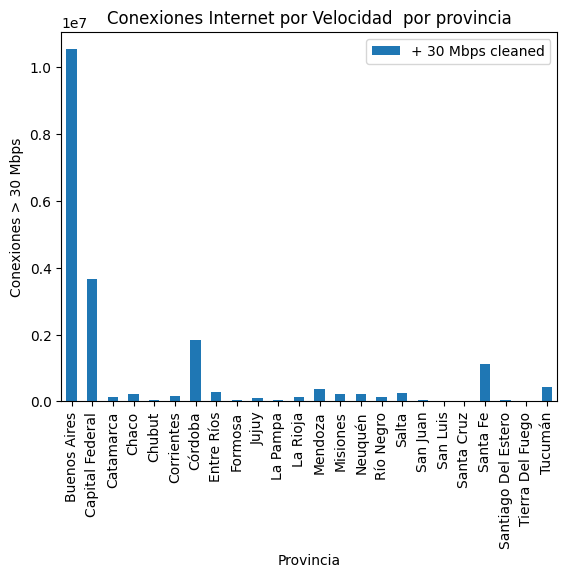

In [142]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras
df.plot.bar(x='Provincia', y='+ 30 Mbps cleaned', rot=90)
plt.ylabel('Conexiones > 30 Mbps')
plt.title('Conexiones Internet por Velocidad  por provincia')
plt.show()


In [123]:
df_merged

,Provincia,Total Poblacion,Total Viviendas,Banda ancha fija,Promedio
0,Capital Federal,3120612,1640710,1545534,0.941991
1,Buenos Aires,17569053,6701808,4715469,0.703611
2,Catamarca,429556,159438,70292,0.440874
3,Chaco,1142963,402101,144141,0.358470
4,Chubut,603120,237133,164874,0.695281
5,Córdoba,3978984,1633904,1038600,0.635655
6,Corrientes,1197553,407035,144842,0.355847
7,Entre Ríos,1426426,560557,268937,0.479767
8,Formosa,606041,213173,68537,0.321509
9,Jujuy,797955,276548,118823,0.429665


In [124]:
df = pd.merge(df, df_merged[['Provincia', 'Total Poblacion']], on='Provincia', how='left')


In [125]:
df

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS,+ 1 Mbps - 6 Mbps cleaned,+ 30 Mbps cleaned,Total cleaned,Total Poblacion
0,Buenos Aires,92,86,927,831,415,157,898935,10535495,13944275,17569053
1,Capital Federal,1561,17,217,168,103,212,110325,3670431,4501991,3120612
2,Catamarca,213,1253,18,21,10,6,11171,129939,199679,429556
3,Chaco,1383,989,60,37,44,14,51273,218607,431829,1142963
4,Chubut,331,4,94,102,43,55,152880,47012,500211,603120
5,Corrientes,201,11,74,42,53,21,72243,155652,432421,1197553
6,Córdoba,298,36,358,216,90,40,479732,1846771,3068906,3978984
7,Entre Ríos,321,16,145,79,85,50,145922,282721,806237,1426426
8,Formosa,291,1162,46,19,1871,1767,71485,49058,190967,606041
9,Jujuy,174,5,47,111,1644,4,60734,118573,350646,797955


In [126]:
total_poblacion = df['Total Poblacion'].sum()


In [127]:
total_poblacion

46044703

In [128]:
total_30mbps = df['+ 30 Mbps cleaned'].sum()


In [129]:
total_30mbps

20073859

In [130]:
porcentaje_consumo = (df['+ 30 Mbps cleaned'].sum() / df['Total Poblacion'].sum()) * 100


In [131]:
porcentaje_consumo

43.59645668688535

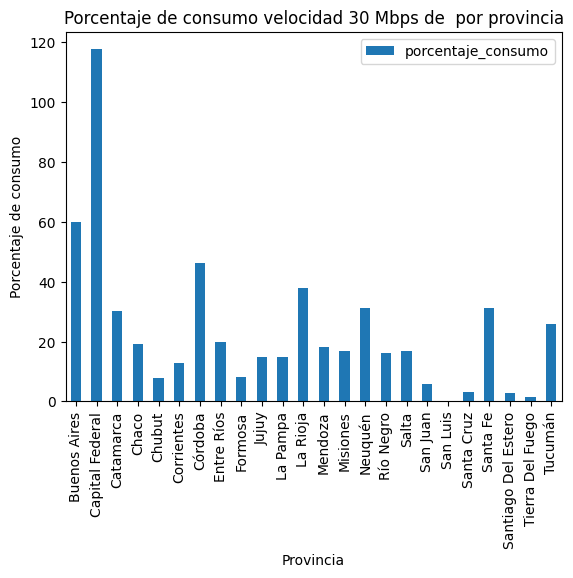

In [143]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de consumo por provincia
df['porcentaje_consumo'] = (df['+ 30 Mbps cleaned'] / df['Total Poblacion']) * 100

# Crear un gráfico de barras
df.plot.bar(x='Provincia', y='porcentaje_consumo', rot=90)
plt.ylabel('Porcentaje de consumo')
plt.title('Porcentaje de consumo velocidad 30 Mbps de  por provincia')
plt.show()



EDA ARCHIVO 3

In [133]:
import pandas as pd

# Utiliza la función read_csv() para leer los datos en un DataFrame
df3 = pd.read_csv("Listadodelocalidadesconconectividadainternet_2750221688857167301.csv")

# Ahora puedes trabajar con los datos en el DataFrame
# imprimir las primeras filas del DataFrame
df3.head(5)

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [134]:
num_rows, num_cols = df3.shape
print(f"El marco de datos tiene {num_rows} filas y {num_cols} columnas.")


El marco de datos tiene 4312 filas y 12 columnas.


In [135]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g = df3[df3['4G'] == '--']

# Mostrar el DataFrame resultante
sin_4g


,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
6,BUENOS AIRES,Balcarce,San Agustín,--,--,--,--,--,--,SI,SI,--
9,BUENOS AIRES,Baradero,Irineo Portela,--,--,--,SI,--,--,SI,SI,SI
13,CHUBUT,Futaleufú,Lago Rosario,--,--,--,--,--,--,SI,--,SI
...,...,...,...,...,...,...,...,...,...,...,...,...
4291,CHUBUT,Escalante,Barrio Laprida,--,--,--,--,--,--,--,--,--
4292,CHUBUT,Escalante,Barrio Manantial Rosales,--,--,--,--,--,--,--,--,--
4296,CHUBUT,Escalante,Barrio Rodriguez Peña,--,--,--,--,--,--,--,--,--
4298,CHUBUT,Escalante,Barrio Sarmiento,--,--,--,--,--,SI,--,--,--


In [136]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g_buenos_aires = df3[(df3['Provincia'] == 'BUENOS AIRES') & (df3['4G'] == '--')]

# Mostrar el número de localidades sin 4G en Buenos Aires
print(f'Hay {len(sin_4g_buenos_aires)} localidades en Buenos Aires que no tienen 4G.')


Hay 246 localidades en Buenos Aires que no tienen 4G.


In [137]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g_buenos_aires = df3[(df3['Provincia'] == 'BUENOS AIRES') & (df3['4G'] == '--')]

# Agrupar por partido y contar el número de localidades sin 4G en cada partido
partidos_sin_4g = sin_4g_buenos_aires.groupby('Partido').size()

# Mostrar el resultado
print(f'Hay {len(partidos_sin_4g)} partidos en Buenos Aires que tienen al menos una localidad sin 4G.')
print('Estos son los partidos y el número de localidades sin 4G en cada uno:')
partidos_sin_4g


Hay 86 partidos en Buenos Aires que tienen al menos una localidad sin 4G.
Estos son los partidos y el número de localidades sin 4G en cada uno:


Partido
25 de Mayo                5
9 de Julio                4
Adolfo Alsina             6
Adolfo Gonzales Chaves    1
Alberti                   3
                         ..
Trenque Lauquen           3
Tres Arroyos              3
Tres Lomas                1
Villarino                 3
Zárate                    1
Length: 86, dtype: int64

In [138]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g_capital_federal = df3[(df3['Provincia'] == 'CAPITAL FEDERAL') & (df3['4G'] == '--')]

# Mostrar el número de localidades sin 4G en Capital Federal
print(f'Hay {len(sin_4g_capital_federal)} localidades en Capital Federal que no tienen 4G.')


Hay 0 localidades en Capital Federal que no tienen 4G.


In [139]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g_capital_federal = df3[(df3['Provincia'] == 'CAPITAL FEDERAL') & (df3['4G'] == '--')]

# Agrupar por partido y contar el número de localidades sin 4G en cada partido
partidos_sin_4g = sin_4g_capital_federal.groupby('Partido').size()

# Mostrar el resultado
print(f'Hay {len(partidos_sin_4g)} partidos en Capital Federal que tienen al menos una localidad sin 4G.')
print('Estos son los partidos y el número de localidades sin 4G en cada uno:')
print(partidos_sin_4g)


Hay 0 partidos en Capital Federal que tienen al menos una localidad sin 4G.
Estos son los partidos y el número de localidades sin 4G en cada uno:
Series([], dtype: int64)


In [140]:
import pandas as pd

# Suponiendo que tu DataFrame ya está cargado en la variable 'df'
sin_4g_mendoza = df3[(df3['Provincia'] == 'MENDOZA') & (df3['4G'] == '--')]

# Agrupar por partido y contar el número de localidades sin 4G en cada partido
partidos_sin_4g = sin_4g_mendoza.groupby('Partido').size()

# Mostrar el resultado
print(f'Hay {len(partidos_sin_4g)} partidos en Mendoza que tienen al menos una localidad sin 4G.')
print('Estos son los partidos y el número de localidades sin 4G en cada uno:')
print(partidos_sin_4g)


Hay 15 partidos en Mendoza que tienen al menos una localidad sin 4G.
Estos son los partidos y el número de localidades sin 4G en cada uno:
Partido
Godoy Cruz        1
Guaymallén        2
Junín             3
La Paz            1
Las Heras         6
Lavalle          15
Luján de Cuyo     9
Maipú             3
Rivadavia        10
San Carlos        2
San Martín       11
San Rafael       12
Santa Rosa        2
Tunuyán           2
Tupungato         3
dtype: int64


In [141]:
partidos_sin_4g

Partido
Godoy Cruz        1
Guaymallén        2
Junín             3
La Paz            1
Las Heras         6
Lavalle          15
Luján de Cuyo     9
Maipú             3
Rivadavia        10
San Carlos        2
San Martín       11
San Rafael       12
Santa Rosa        2
Tunuyán           2
Tupungato         3
dtype: int64